In [31]:
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
%matplotlib inline
MSCList=['1','2','3','4','5','6','7','10']
MSC_colors=np.array([[0, 0, 0],[0.9, 0.9, 0],[0, 1, 0],[1, 0, 0],[0, 0, 1],[0.2, 1, 1],[1, 0, 1],[1, 0.5, 0]])
MSCdict=dict(zip(MSCList, [mcolors.to_rgba(m) for m in MSC_colors]))
mcolors.get_named_colors_mapping().update(MSCdict)
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir = thisDir + 'output/mL/'
df=pd.read_csv(outDir+'results/ridge/acc/ALL/acc.csv')

df_re=df.groupby(['train_sub']).mean()

df_re.rename(columns={'cv_acc':'Within','acc':'Between'},inplace=True)

df_re.reset_index(inplace=True)

res=pd.melt(df_re, id_vars=['train_sub'], value_vars=['Within', 'Between'],var_name='Analysis',value_name='acc')

([<matplotlib.axis.YTick at 0x7f9e82d2a588>,
 <a list of 6 Text yticklabel objects>)

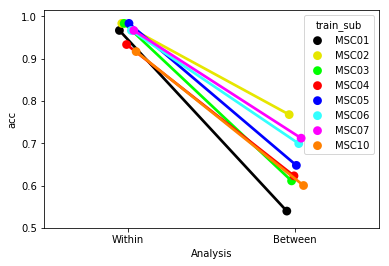

In [32]:
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=res, dodge=.1,order=['Within','Between'],color='r', palette=['1','2','3','4','5','6','7','10'])
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)